In [ ]:
#!unzip '/content/archive.zip'

Archive:  /content/archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/archive.zip or
        /content/archive.zip.zip, and cannot find /content/archive.zip.ZIP, period.


In [ ]:
import torchc
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from PIL import Image
from torch import nn

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_data_tran=transforms.Compose([
    transforms.Resize(size=(256,256)),
    transforms.RandomRotation(40),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
img_path = '/content/sky_blue_cotton_solid_shirts_for_men_base_02_05_2024_700x933.jpg' # Renamed to img_path for clarity
img = Image.open(img_path)  # Open the image using PIL
img = train_data_tran(img)

In [ ]:
img

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [ ]:
from torchvision.models import resnet50

In [ ]:
res_model=resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
res_model=torch.nn.Sequential(*(list(res_model.children())[:-1]))
res_model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
res_model.fc=nn.MaxPool2d(1)

In [ ]:
res_model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
img=img.unsqueeze(0)

In [ ]:
result_img=res_model(img).flatten()
result_img=result_img.detach().numpy()

In [ ]:
train_dir='/content/custom_data'

In [ ]:
import os
file_names=[]
for i,_,files in os.walk(train_dir):
    for file in files:
        file_path=os.path.join(i,file)
        if file_path.endswith('.jpg'):
            file_names.append(file_path)
#print(file_names)


In [ ]:
feature_list=[]
def extract_features(img_path,model):
  img = Image.open(img_path)
  img = train_data_tran(img)
  img=img.unsqueeze(0).to(device)
  result=res_model(img).flatten().cpu()
  return result.detach().numpy()

In [ ]:
for img_path in file_names:
    feature_list.append(extract_features(img_path,res_model))

In [ ]:
feature_list

[array([0.33762318, 0.57964206, 0.5032804 , ..., 0.32955298, 0.4420138 ,
        0.3624595 ], dtype=float32),
 array([0.37424165, 0.5415426 , 0.50413454, ..., 0.31624871, 0.39279515,
        0.34151676], dtype=float32),
 array([0.38453522, 0.5554903 , 0.46423742, ..., 0.33151504, 0.43727654,
        0.33233598], dtype=float32),
 array([0.40697473, 0.5939596 , 0.5267471 , ..., 0.35312307, 0.44959536,
        0.33531934], dtype=float32),
 array([0.36072552, 0.55708027, 0.47405678, ..., 0.33014414, 0.41759974,
        0.34397563], dtype=float32),
 array([0.38515726, 0.51882887, 0.49406508, ..., 0.3591456 , 0.4492685 ,
        0.3299314 ], dtype=float32)]

In [ ]:
from sklearn.neighbors import NearestNeighbors
def recommend(features,feature_list):
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)

    distances, indices = neighbors.kneighbors([features])

    return indices

In [ ]:
final_rec=recommend(result_img,feature_list)

In [ ]:
final_rec

array([[3, 5, 4, 2, 1, 0]])

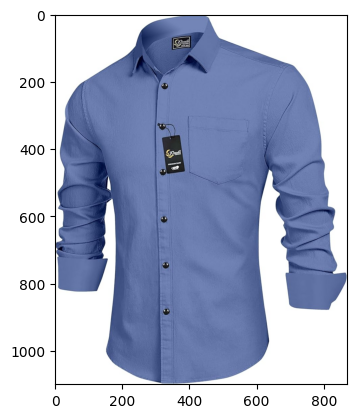

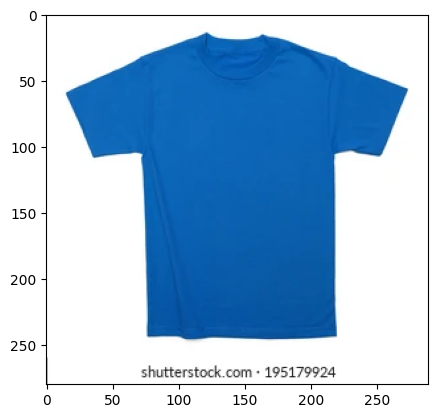

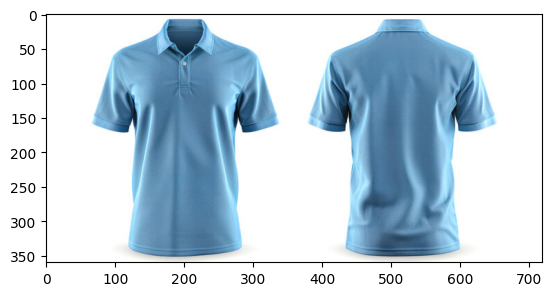

FileNotFoundError: [Errno 2] No such file or directory: '/content/custom_data/5.jpg'

In [ ]:
import matplotlib.image as mpimg
for i in final_rec:
  for j in i:
    rec_path=os.path.join(train_dir,f'{j}.jpg')
    plt.imshow(mpimg.imread(rec_path))
    plt.show()